In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp 

import torch 
import torch.nn as nn
import torch.nn.functional as F

In [2]:
mp_holist = mp.solutions.holistic 
mp_draw = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(img, model):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img.flags.writeable = False                 
    result = model.process(img)                 # Make prediction
    img.flags.writeable = True                   
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 
    return img, result

In [4]:
def draw_landmarks(img, result):
    mp_draw.draw_landmarks(img, result.face_landmarks, mp_holist.FACEMESH_CONTOURS) # Draw face connections
    mp_draw.draw_landmarks(img, result.pose_landmarks, mp_holist.POSE_CONNECTIONS) # Draw pose connections
    mp_draw.draw_landmarks(img, result.left_hand_landmarks, mp_holist.HAND_CONNECTIONS) # Draw left hand connections
    mp_draw.draw_landmarks(img, result.right_hand_landmarks, mp_holist.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(img, result):
    mp_draw.draw_landmarks(img, result.face_landmarks, mp_holist.FACEMESH_CONTOURS, 
                             mp_draw.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), # color the joint 
                             mp_draw.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1) #color the connection
                             ) 
    # mp_draw.draw_landmarks(img, result.face_landmarks, mp_holist.FACEMESH_CONTOURS, 
    #                          mp_draw.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), # color the joint 
    #                          mp_draw.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1) #color the connection
    #                          ) 
    
    mp_draw.draw_landmarks(img, result.pose_landmarks, mp_holist.POSE_CONNECTIONS,
                             mp_draw.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_draw.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_draw.draw_landmarks(img, result.left_hand_landmarks, mp_holist.HAND_CONNECTIONS, 
                             mp_draw.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_draw.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    mp_draw.draw_landmarks(img, result.right_hand_landmarks, mp_holist.HAND_CONNECTIONS, 
                             mp_draw.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_draw.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
mp_holist.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    left_hnd=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hnd=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,left_hnd,right_hnd,face])
# concatenating for the model to detect the sign language

In [8]:
import os 
video_dir = "C:/Users/araya/Desktop/keypoints/video_extract"
video_list = []
video_list = os.listdir(video_dir)

len(video_list)

40

In [9]:
video_list

['กฎกระทรวง.mp4',
 'กฎหมายรัฐธรรมนูญ.mp4',
 'กรมอนามัย.mp4',
 'กรรม.mp4',
 'กรรมสิทธิ์.mp4',
 'กระโดด.mp4',
 'กล้วยบวชชี.mp4',
 'กล้วยเชื่อม.mp4',
 'กังวล.mp4',
 'กีฬา.mp4',
 'น้อง.mp4',
 'เขิน.mp4',
 'เขื่อนดิน.mp4',
 'เขื่อนสิริกิติ์.mp4',
 'เข้าใจผิด.mp4',
 'เคย.mp4',
 'เครียด.mp4',
 'เครื่องปั่นดิน.mp4',
 'เครื่องหมายการค้า.mp4',
 'เจอ.mp4',
 'เจ้าหนี้.mp4',
 'เช่าซื้อ.mp4',
 'เช่าทรัพย์.mp4',
 'เซอร์เบีย.mp4',
 'เซเนกัล.mp4',
 'เซ็ง.mp4',
 'เดิน.mp4',
 'เดิมพัน.mp4',
 'เพลีย.mp4',
 'เมื่อย.mp4',
 'เม็กซิโก.mp4',
 'เฮโรอีน.mp4',
 'แกมเบีย.mp4',
 'แซมเบีย.mp4',
 'โกหก.mp4',
 'โจทก์.mp4',
 'โชจู.mp4',
 'ใกล้.mp4',
 'ไดโนเสาร์.mp4',
 'ไอซ์.mp4']

In [10]:
# Path for exported data, numpy arrays
Model_Data=os.path.join('Data for different actions')

actions = np.array(video_list)

no_of_seqs = 1

# 30 frames in length
seq_length = 160

In [11]:
actions

array(['กฎกระทรวง.mp4', 'กฎหมายรัฐธรรมนูญ.mp4', 'กรมอนามัย.mp4',
       'กรรม.mp4', 'กรรมสิทธิ์.mp4', 'กระโดด.mp4', 'กล้วยบวชชี.mp4',
       'กล้วยเชื่อม.mp4', 'กังวล.mp4', 'กีฬา.mp4', 'น้อง.mp4', 'เขิน.mp4',
       'เขื่อนดิน.mp4', 'เขื่อนสิริกิติ์.mp4', 'เข้าใจผิด.mp4', 'เคย.mp4',
       'เครียด.mp4', 'เครื่องปั่นดิน.mp4', 'เครื่องหมายการค้า.mp4',
       'เจอ.mp4', 'เจ้าหนี้.mp4', 'เช่าซื้อ.mp4', 'เช่าทรัพย์.mp4',
       'เซอร์เบีย.mp4', 'เซเนกัล.mp4', 'เซ็ง.mp4', 'เดิน.mp4',
       'เดิมพัน.mp4', 'เพลีย.mp4', 'เมื่อย.mp4', 'เม็กซิโก.mp4',
       'เฮโรอีน.mp4', 'แกมเบีย.mp4', 'แซมเบีย.mp4', 'โกหก.mp4',
       'โจทก์.mp4', 'โชจู.mp4', 'ใกล้.mp4', 'ไดโนเสาร์.mp4', 'ไอซ์.mp4'],
      dtype='<U21')

Collecting keypoint values for Training nd Testing

In [12]:
# Define the directory where your videos are stored
directory = "C:/Users/araya/Desktop/keypoints/video_extract"

In [13]:
directory

'C:/Users/araya/Desktop/keypoints/video_extract'

In [14]:
for filename in actions:
    print(directory + '/' + filename)

C:/Users/araya/Desktop/keypoints/video_extract/กฎกระทรวง.mp4
C:/Users/araya/Desktop/keypoints/video_extract/กฎหมายรัฐธรรมนูญ.mp4
C:/Users/araya/Desktop/keypoints/video_extract/กรมอนามัย.mp4
C:/Users/araya/Desktop/keypoints/video_extract/กรรม.mp4
C:/Users/araya/Desktop/keypoints/video_extract/กรรมสิทธิ์.mp4
C:/Users/araya/Desktop/keypoints/video_extract/กระโดด.mp4
C:/Users/araya/Desktop/keypoints/video_extract/กล้วยบวชชี.mp4
C:/Users/araya/Desktop/keypoints/video_extract/กล้วยเชื่อม.mp4
C:/Users/araya/Desktop/keypoints/video_extract/กังวล.mp4
C:/Users/araya/Desktop/keypoints/video_extract/กีฬา.mp4
C:/Users/araya/Desktop/keypoints/video_extract/น้อง.mp4
C:/Users/araya/Desktop/keypoints/video_extract/เขิน.mp4
C:/Users/araya/Desktop/keypoints/video_extract/เขื่อนดิน.mp4
C:/Users/araya/Desktop/keypoints/video_extract/เขื่อนสิริกิติ์.mp4
C:/Users/araya/Desktop/keypoints/video_extract/เข้าใจผิด.mp4
C:/Users/araya/Desktop/keypoints/video_extract/เคย.mp4
C:/Users/araya/Desktop/keypoints/video_e

In [15]:
file_paths = []
for action in actions:
    video_path = os.path.join('Data for different actions/', action)
    # print(video_path)
    # print(action)
    file_paths.append(video_path + '/' + action.split(".")[0] + ".npy")
print(file_paths)

['Data for different actions/กฎกระทรวง.mp4/กฎกระทรวง.npy', 'Data for different actions/กฎหมายรัฐธรรมนูญ.mp4/กฎหมายรัฐธรรมนูญ.npy', 'Data for different actions/กรมอนามัย.mp4/กรมอนามัย.npy', 'Data for different actions/กรรม.mp4/กรรม.npy', 'Data for different actions/กรรมสิทธิ์.mp4/กรรมสิทธิ์.npy', 'Data for different actions/กระโดด.mp4/กระโดด.npy', 'Data for different actions/กล้วยบวชชี.mp4/กล้วยบวชชี.npy', 'Data for different actions/กล้วยเชื่อม.mp4/กล้วยเชื่อม.npy', 'Data for different actions/กังวล.mp4/กังวล.npy', 'Data for different actions/กีฬา.mp4/กีฬา.npy', 'Data for different actions/น้อง.mp4/น้อง.npy', 'Data for different actions/เขิน.mp4/เขิน.npy', 'Data for different actions/เขื่อนดิน.mp4/เขื่อนดิน.npy', 'Data for different actions/เขื่อนสิริกิติ์.mp4/เขื่อนสิริกิติ์.npy', 'Data for different actions/เข้าใจผิด.mp4/เข้าใจผิด.npy', 'Data for different actions/เคย.mp4/เคย.npy', 'Data for different actions/เครียด.mp4/เครียด.npy', 'Data for different actions/เครื่องปั่นดิน.mp4/เครื

In [16]:
def load_keypoint_sequences(file_paths):
    keypoint_sequences = []
    for file_path in file_paths:
        keypoints = np.load(file_path)
        keypoint_sequences.append(torch.tensor(keypoints, dtype=torch.float32))
    return keypoint_sequences

In [17]:
# Load the sequences
import torch
sequences = load_keypoint_sequences(file_paths)
sequences

[tensor([[ 0.5013,  0.2452, -1.2167,  ...,  0.5663,  0.2188,  0.0098],
         [ 0.4997,  0.2482, -1.4690,  ...,  0.5652,  0.2181,  0.0106],
         [ 0.4984,  0.2500, -1.4853,  ...,  0.5654,  0.2185,  0.0112],
         ...,
         [ 0.4861,  0.2513, -1.3416,  ...,  0.5572,  0.2177,  0.0091],
         [ 0.4873,  0.2514, -1.3574,  ...,  0.5575,  0.2172,  0.0097],
         [ 0.4883,  0.2516, -1.3579,  ...,  0.5577,  0.2170,  0.0101]]),
 tensor([[ 0.4922,  0.2382, -1.2850,  ...,  0.5578,  0.2124,  0.0094],
         [ 0.4920,  0.2405, -1.4288,  ...,  0.5571,  0.2116,  0.0099],
         [ 0.4920,  0.2409, -1.4093,  ...,  0.5567,  0.2122,  0.0098],
         ...,
         [ 0.4814,  0.2260, -1.3318,  ...,  0.5503,  0.1923,  0.0123],
         [ 0.4815,  0.2257, -1.3351,  ...,  0.5503,  0.1921,  0.0122],
         [ 0.4815,  0.2255, -1.3497,  ...,  0.5501,  0.1919,  0.0124]]),
 tensor([[ 0.5049,  0.2371, -1.2115,  ...,  0.5643,  0.2082,  0.0088],
         [ 0.5045,  0.2381, -1.1896,  ...,  0

In [18]:
# Pad the sequences to the same length
from torch.nn.utils.rnn import pad_sequence
padded_sequences = pad_sequence(sequences, batch_first=True)
pad_sequence
print(padded_sequences.shape) # (batch_size, max_sequence_length, num_keypoints)

torch.Size([40, 160, 1662])


In [19]:
labels = [action.split(".")[0] for action in actions]
labels

['กฎกระทรวง',
 'กฎหมายรัฐธรรมนูญ',
 'กรมอนามัย',
 'กรรม',
 'กรรมสิทธิ์',
 'กระโดด',
 'กล้วยบวชชี',
 'กล้วยเชื่อม',
 'กังวล',
 'กีฬา',
 'น้อง',
 'เขิน',
 'เขื่อนดิน',
 'เขื่อนสิริกิติ์',
 'เข้าใจผิด',
 'เคย',
 'เครียด',
 'เครื่องปั่นดิน',
 'เครื่องหมายการค้า',
 'เจอ',
 'เจ้าหนี้',
 'เช่าซื้อ',
 'เช่าทรัพย์',
 'เซอร์เบีย',
 'เซเนกัล',
 'เซ็ง',
 'เดิน',
 'เดิมพัน',
 'เพลีย',
 'เมื่อย',
 'เม็กซิโก',
 'เฮโรอีน',
 'แกมเบีย',
 'แซมเบีย',
 'โกหก',
 'โจทก์',
 'โชจู',
 'ใกล้',
 'ไดโนเสาร์',
 'ไอซ์']

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labels = le.fit_transform(labels)
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64)

In [21]:
# import pandas as pd
# y = pd.read_csv("script.csv")
# y

In [22]:
# y["label"] = y["label"].astype(int)
# labels = y.label
# labels

In [23]:
import torch
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence

# Create a custom dataset
class KeypointDataset(Dataset):
    def __init__(self, file_paths, labels):
        self.file_paths = file_paths
        self.labels = labels
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        keypoints = np.load(self.file_paths[idx])
        label = self.labels[idx]
        return torch.tensor(keypoints, dtype=torch.float32), label

In [24]:
# Create the dataset
dataset = KeypointDataset(file_paths, labels)

In [25]:
print(dataset.file_paths)
print(dataset.labels)

['Data for different actions/กฎกระทรวง.mp4/กฎกระทรวง.npy', 'Data for different actions/กฎหมายรัฐธรรมนูญ.mp4/กฎหมายรัฐธรรมนูญ.npy', 'Data for different actions/กรมอนามัย.mp4/กรมอนามัย.npy', 'Data for different actions/กรรม.mp4/กรรม.npy', 'Data for different actions/กรรมสิทธิ์.mp4/กรรมสิทธิ์.npy', 'Data for different actions/กระโดด.mp4/กระโดด.npy', 'Data for different actions/กล้วยบวชชี.mp4/กล้วยบวชชี.npy', 'Data for different actions/กล้วยเชื่อม.mp4/กล้วยเชื่อม.npy', 'Data for different actions/กังวล.mp4/กังวล.npy', 'Data for different actions/กีฬา.mp4/กีฬา.npy', 'Data for different actions/น้อง.mp4/น้อง.npy', 'Data for different actions/เขิน.mp4/เขิน.npy', 'Data for different actions/เขื่อนดิน.mp4/เขื่อนดิน.npy', 'Data for different actions/เขื่อนสิริกิติ์.mp4/เขื่อนสิริกิติ์.npy', 'Data for different actions/เข้าใจผิด.mp4/เข้าใจผิด.npy', 'Data for different actions/เคย.mp4/เคย.npy', 'Data for different actions/เครียด.mp4/เครียด.npy', 'Data for different actions/เครื่องปั่นดิน.mp4/เครื

In [26]:
# Collate function for padding
def collate_fn(batch):
    sequences, labels = zip(*batch)
    padded_sequences = pad_sequence(sequences, batch_first=True)
    return padded_sequences, torch.tensor(labels)

In [27]:
# Create the DataLoader
batch_size = 4
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
data_loader

In [28]:
# Set device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes,dropout):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        # h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate the LSTM
        out, _ = self.lstm(self.dropout(x))
        
        # Use the last time step's output for classification
        out = out[:, -1, :]
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [30]:
# Initialize the model, loss function, and optimizer
model = LSTMModel(input_size=1662, hidden_size=256, num_layers=2, num_classes=40, dropout=0.5).to(device)

In [31]:
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [32]:
# Training loop
# References : https://saturncloud.io/blog/calculating-the-accuracy-of-pytorch-models-every-epoch/#:~:text=In%20order%20to%20calculate%20the,tensor%20along%20a%20specified%20dimension
num_epochs = 900
loss_logger = []
accuracy_logger = []
# n_epochs = []
for epoch in range(num_epochs):
    total_correct = 0
    total_samples = 0
    model.train()
    for i, (sequences, labels) in enumerate(data_loader):
        # Move data to the device
        # labels = labels.type(torch.LongTensor)   # casting to long
        sequences = sequences.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(sequences)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # loss_logger.append(loss.item())
    loss_logger.append(loss.item())
    accuracy = 100 * total_correct /total_samples
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f} , Accuracy : {accuracy:.2f}%')
    accuracy_logger.append(accuracy)
    # n_epochs.append(epoch)

Epoch [1/900], Loss: 3.7831 , Accuracy : 0.00%
Epoch [2/900], Loss: 3.5263 , Accuracy : 2.50%
Epoch [3/900], Loss: 3.5447 , Accuracy : 0.00%
Epoch [4/900], Loss: 3.7418 , Accuracy : 0.00%
Epoch [5/900], Loss: 3.9117 , Accuracy : 2.50%
Epoch [6/900], Loss: 3.4680 , Accuracy : 2.50%
Epoch [7/900], Loss: 3.3031 , Accuracy : 7.50%
Epoch [8/900], Loss: 3.5347 , Accuracy : 7.50%
Epoch [9/900], Loss: 3.6161 , Accuracy : 2.50%
Epoch [10/900], Loss: 3.4600 , Accuracy : 5.00%
Epoch [11/900], Loss: 3.0819 , Accuracy : 5.00%
Epoch [12/900], Loss: 2.6780 , Accuracy : 5.00%
Epoch [13/900], Loss: 3.6216 , Accuracy : 2.50%
Epoch [14/900], Loss: 3.6118 , Accuracy : 7.50%
Epoch [15/900], Loss: 3.0621 , Accuracy : 7.50%
Epoch [16/900], Loss: 3.2951 , Accuracy : 7.50%
Epoch [17/900], Loss: 3.7246 , Accuracy : 7.50%
Epoch [18/900], Loss: 3.1941 , Accuracy : 7.50%
Epoch [19/900], Loss: 2.3634 , Accuracy : 7.50%
Epoch [20/900], Loss: 3.4098 , Accuracy : 12.50%
Epoch [21/900], Loss: 3.3134 , Accuracy : 10.00%

In [33]:
loss_logger

[3.7831358909606934,
 3.5263123512268066,
 3.5446534156799316,
 3.741818428039551,
 3.9117231369018555,
 3.4680473804473877,
 3.303071975708008,
 3.5347397327423096,
 3.6161351203918457,
 3.459988594055176,
 3.0818963050842285,
 2.6780247688293457,
 3.6215662956237793,
 3.6117560863494873,
 3.06209135055542,
 3.295128583908081,
 3.724562883377075,
 3.194136619567871,
 2.363399028778076,
 3.4098165035247803,
 3.3133773803710938,
 3.574057102203369,
 3.5930237770080566,
 3.083930253982544,
 2.6315886974334717,
 2.5958709716796875,
 3.374483108520508,
 3.1794679164886475,
 3.2020528316497803,
 3.1624133586883545,
 2.808588981628418,
 2.737924814224243,
 3.1584255695343018,
 3.9618589878082275,
 3.1542458534240723,
 2.6454849243164062,
 2.653958320617676,
 5.739311218261719,
 2.877842903137207,
 3.5595126152038574,
 4.1989312171936035,
 3.292365550994873,
 3.3587918281555176,
 2.8901119232177734,
 2.883617401123047,
 2.684433937072754,
 2.823399305343628,
 2.750541925430298,
 2.57813525199

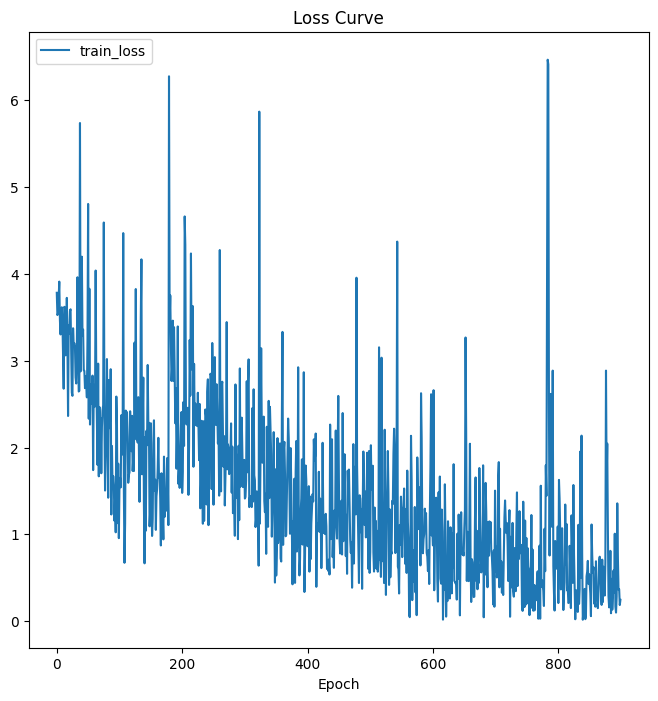

In [50]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
plt.title("Loss Curve")
plt.plot(loss_logger, label='train_loss')
# plt.plot(accuracy_logger,label='accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()

### Save and Load Model

In [35]:
pad_sequence(sequences, batch_first=True)

tensor([[[ 0.4883,  0.2402, -1.1024,  ...,  0.5482,  0.2132,  0.0081],
         [ 0.4878,  0.2402, -1.1906,  ...,  0.5469,  0.2135,  0.0083],
         [ 0.4863,  0.2402, -1.1774,  ...,  0.5477,  0.2141,  0.0087],
         ...,
         [ 0.4788,  0.3129, -1.6072,  ...,  0.5349,  0.2531,  0.0022],
         [ 0.4782,  0.3129, -1.6350,  ...,  0.5344,  0.2525,  0.0022],
         [ 0.4771,  0.3131, -1.6312,  ...,  0.5339,  0.2515,  0.0022]],

        [[ 0.5064,  0.2529, -1.3080,  ...,  0.5751,  0.2261,  0.0114],
         [ 0.5055,  0.2550, -1.3556,  ...,  0.5752,  0.2257,  0.0106],
         [ 0.5048,  0.2568, -1.3925,  ...,  0.5751,  0.2260,  0.0110],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.5269,  0.2488, -1.5232,  ...,  0.5929,  0.2181,  0.0118],
         [ 0.5260,  0.2493, -1.4445,  ...,  0

In [36]:
# Put the model in evaluation mode
model.eval()

# No need to track gradients during inference
with torch.no_grad():
    # Get the model's output (logits)
    outputs = model(padded_sequences.to(device))

# outputs = torch.softmax(outputs, dim=1)
# outputs = torch.max(outputs,1)

outputs


tensor([[ 14.9225, -10.0483,  -7.1353,  ...,  -7.0063,   7.2185,  -4.7995],
        [-10.5321,  10.9464,  -1.5549,  ...,   6.6648,   0.2603,  -3.3184],
        [  1.7720,  -4.2489,  14.7448,  ...,  -5.6882,  -7.1407,   2.8332],
        ...,
        [-12.4304,   2.4266,  -3.9808,  ...,  15.4746,   0.2760,   8.3517],
        [ -1.8419,   1.3473,  -6.2136,  ...,   4.6245,  12.7422,  -1.5424],
        [ -9.1243,  -4.1958,   2.1978,  ...,   9.5241,  -3.6268,  17.4895]],
       device='cuda:0')

In [37]:
padded_sequences

tensor([[[ 0.5013,  0.2452, -1.2167,  ...,  0.5663,  0.2188,  0.0098],
         [ 0.4997,  0.2482, -1.4690,  ...,  0.5652,  0.2181,  0.0106],
         [ 0.4984,  0.2500, -1.4853,  ...,  0.5654,  0.2185,  0.0112],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.4922,  0.2382, -1.2850,  ...,  0.5578,  0.2124,  0.0094],
         [ 0.4920,  0.2405, -1.4288,  ...,  0.5571,  0.2116,  0.0099],
         [ 0.4920,  0.2409, -1.4093,  ...,  0.5567,  0.2122,  0.0098],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.5049,  0.2371, -1.2115,  ...,  0.5643,  0.2082,  0.0088],
         [ 0.5045,  0.2381, -1.1896,  ...,  0

In [38]:
file_paths = ["Data for different actions/เครียด.mp4/เครียด.npy"]

In [39]:
# Load the sequences
import torch
sequences = load_keypoint_sequences(file_paths)
# Change list to numpy array 
sequences = np.array(sequences)
# Change numpy array to tensor
sequences = torch.FloatTensor(sequences)
sequences = pad_sequence(sequences, batch_first=True)
sequences

tensor([[[ 0.5035,  0.2282, -1.1379,  ...,  0.5710,  0.1953,  0.0120],
         [ 0.5033,  0.2284, -1.2771,  ...,  0.5713,  0.1954,  0.0123],
         [ 0.5032,  0.2286, -1.2743,  ...,  0.5715,  0.1957,  0.0122],
         ...,
         [ 0.4810,  0.2296, -1.4129,  ...,  0.5542,  0.1897,  0.0133],
         [ 0.4812,  0.2296, -1.4275,  ...,  0.5549,  0.1900,  0.0130],
         [ 0.4816,  0.2299, -1.4337,  ...,  0.5557,  0.1903,  0.0133]]])

In [40]:
outputs = model(sequences.to(device))
outputs

tensor([[ -2.6231,   5.4465,  -5.9490,  -6.3985,  -4.9805,   2.2198,  -9.1770,
          -2.9317,  -4.2388,  -8.5526,   0.2187,  -8.2990,  11.4714,  -8.3603,
           1.3618,  -5.8460,  12.1265, -11.4703,  -2.6276,   7.7189,   9.9247,
         -13.2090, -14.3752,   1.2674,   4.0257,  -8.3617, -10.4773,   0.5085,
          -8.0105,   5.8778,   0.3964,  -0.2751,  10.2503,  -2.1970,   6.8231,
           3.4698,   9.8870,  -0.1397,   5.8880, -10.5593]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [41]:
labels = [action.split(".")[0] for action in actions]
labels

['กฎกระทรวง',
 'กฎหมายรัฐธรรมนูญ',
 'กรมอนามัย',
 'กรรม',
 'กรรมสิทธิ์',
 'กระโดด',
 'กล้วยบวชชี',
 'กล้วยเชื่อม',
 'กังวล',
 'กีฬา',
 'น้อง',
 'เขิน',
 'เขื่อนดิน',
 'เขื่อนสิริกิติ์',
 'เข้าใจผิด',
 'เคย',
 'เครียด',
 'เครื่องปั่นดิน',
 'เครื่องหมายการค้า',
 'เจอ',
 'เจ้าหนี้',
 'เช่าซื้อ',
 'เช่าทรัพย์',
 'เซอร์เบีย',
 'เซเนกัล',
 'เซ็ง',
 'เดิน',
 'เดิมพัน',
 'เพลีย',
 'เมื่อย',
 'เม็กซิโก',
 'เฮโรอีน',
 'แกมเบีย',
 'แซมเบีย',
 'โกหก',
 'โจทก์',
 'โชจู',
 'ใกล้',
 'ไดโนเสาร์',
 'ไอซ์']

In [42]:
# Change from tensor to numpy arrat
outputs = outputs.cpu().detach().numpy()

In [43]:
outputs

array([[ -2.6231325 ,   5.446466  ,  -5.9489655 ,  -6.3984523 ,
         -4.9804983 ,   2.2197683 ,  -9.176981  ,  -2.931702  ,
         -4.238834  ,  -8.55262   ,   0.21870942,  -8.299011  ,
         11.471432  ,  -8.360337  ,   1.3617972 ,  -5.846046  ,
         12.126515  , -11.47032   ,  -2.6275904 ,   7.7188606 ,
          9.924738  , -13.208975  , -14.375236  ,   1.2673769 ,
          4.0256796 ,  -8.361705  , -10.477296  ,   0.50847334,
         -8.010472  ,   5.8777866 ,   0.3964268 ,  -0.27508855,
         10.250316  ,  -2.1969538 ,   6.823073  ,   3.46983   ,
          9.887024  ,  -0.13970643,   5.887996  , -10.559281  ]],
      dtype=float32)

In [44]:
for idx, word in enumerate(outputs):
    # max_value = torch.max(outputs)
    list_outputs = max(outputs)
    print(list_outputs)
    # print(max_value)
    # print(max_value.detach().numpy())

[ -2.6231325    5.446466    -5.9489655   -6.3984523   -4.9804983
   2.2197683   -9.176981    -2.931702    -4.238834    -8.55262
   0.21870942  -8.299011    11.471432    -8.360337     1.3617972
  -5.846046    12.126515   -11.47032     -2.6275904    7.7188606
   9.924738   -13.208975   -14.375236     1.2673769    4.0256796
  -8.361705   -10.477296     0.50847334  -8.010472     5.8777866
   0.3964268   -0.27508855  10.250316    -2.1969538    6.823073
   3.46983      9.887024    -0.13970643   5.887996   -10.559281  ]


In [45]:
index_max = max(range(len(list_outputs)), key=list_outputs.__getitem__)
index_max

16

In [46]:
print(labels[index_max])

เครียด


In [47]:
correct = 0
num_clip = 0
for clip in labels:
    # print(clip)
    file_paths = [f"Data for different actions/{clip}.mp4/{clip}.npy"]
    # print(file_paths)

    sequences = load_keypoint_sequences(file_paths)
    # Change list to numpy array 
    sequences = np.array(sequences)
    # Change numpy array to tensor
    sequences = torch.FloatTensor(sequences)
    sequences = pad_sequence(sequences, batch_first=True)

    outputs = model(sequences.to(device))

    for idx, word in enumerate(outputs):
        # max_value = torch.max(outputs)
        list_outputs = max(outputs)

    index_max = max(range(len(list_outputs)), key=list_outputs.__getitem__)

    print(f"Input : {clip} Predicted : {labels[index_max]}")

    if clip == labels[index_max]:
        correct = correct+1
    
    num_clip = num_clip + 1 

print(f"Correct Predicted on Training set : {correct} Corrct percentage : {correct*100/num_clip}%")

Input : กฎกระทรวง Predicted : กฎกระทรวง
Input : กฎหมายรัฐธรรมนูญ Predicted : กฎหมายรัฐธรรมนูญ
Input : กรมอนามัย Predicted : กรมอนามัย
Input : กรรม Predicted : เขิน
Input : กรรมสิทธิ์ Predicted : กรรมสิทธิ์
Input : กระโดด Predicted : กฎหมายรัฐธรรมนูญ
Input : กล้วยบวชชี Predicted : กล้วยบวชชี
Input : กล้วยเชื่อม Predicted : กล้วยเชื่อม
Input : กังวล Predicted : กังวล
Input : กีฬา Predicted : กีฬา
Input : น้อง Predicted : น้อง
Input : เขิน Predicted : เขิน
Input : เขื่อนดิน Predicted : เขื่อนดิน
Input : เขื่อนสิริกิติ์ Predicted : เขื่อนสิริกิติ์
Input : เข้าใจผิด Predicted : เข้าใจผิด
Input : เคย Predicted : กล้วยเชื่อม
Input : เครียด Predicted : เครียด
Input : เครื่องปั่นดิน Predicted : เครื่องปั่นดิน
Input : เครื่องหมายการค้า Predicted : เครื่องหมายการค้า
Input : เจอ Predicted : กฎหมายรัฐธรรมนูญ
Input : เจ้าหนี้ Predicted : เขื่อนดิน
Input : เช่าซื้อ Predicted : เช่าซื้อ
Input : เช่าทรัพย์ Predicted : เช่าทรัพย์
Input : เซอร์เบีย Predicted : โกหก
Input : เซเนกัล Predicted : เซเนกัล
Inp

In [48]:
print(labels)

['กฎกระทรวง', 'กฎหมายรัฐธรรมนูญ', 'กรมอนามัย', 'กรรม', 'กรรมสิทธิ์', 'กระโดด', 'กล้วยบวชชี', 'กล้วยเชื่อม', 'กังวล', 'กีฬา', 'น้อง', 'เขิน', 'เขื่อนดิน', 'เขื่อนสิริกิติ์', 'เข้าใจผิด', 'เคย', 'เครียด', 'เครื่องปั่นดิน', 'เครื่องหมายการค้า', 'เจอ', 'เจ้าหนี้', 'เช่าซื้อ', 'เช่าทรัพย์', 'เซอร์เบีย', 'เซเนกัล', 'เซ็ง', 'เดิน', 'เดิมพัน', 'เพลีย', 'เมื่อย', 'เม็กซิโก', 'เฮโรอีน', 'แกมเบีย', 'แซมเบีย', 'โกหก', 'โจทก์', 'โชจู', 'ใกล้', 'ไดโนเสาร์', 'ไอซ์']


In [50]:
import torch
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

In [52]:
loaded_model = LSTMModel(input_size=1662, hidden_size=256, num_layers=2, num_classes=40, dropout=0.5)

In [ ]:
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()

In [ ]:
for param in loaded_model.parameters():
    print(param)

In [ ]:
# import torch
# FILE = "model.pth"
# torch.load(FILE)
# model.eval()

In [ ]:
for param in model.parameters():
    print(param)

### -------------------------------------------------------------------------------------------------------------------------------------------- ###

In [498]:
import pandas as pd

In [ ]:
video_list

In [500]:
columns = ["word"]

In [ ]:
pd.DataFrame(video_list, columns=columns)

ชื่อไฟลล์ที่รวม Augment มาด้วย

In [502]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("Data for different actions")]

In [ ]:
onlyfiles

In [ ]:
df = pd.DataFrame(onlyfiles, columns=columns)
df

In [505]:
df.to_csv('script.csv', index=False)

### Read File

In [ ]:
y = pd.read_csv("script.csv")
y

In [ ]:
y["label"] = y["label"].astype(int)
labels = y.label
labels